In [1]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/pubhome/xli02/opt/miniconda/envs/

In [2]:
features = pd.read_csv("/pubhome/xli02/project/PLIM/deep_learning/RFscore/featured_data/tow_datasets_features_6A.csv", sep='\t')

In [3]:
vina_title =['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
rf_v1_title = features.columns.tolist()[:36]
feature_list = vina_title+rf_v1_title

# PDBbind_minimized(0418)

In [20]:
dataset_name = 'PDBbind_minimized'
test_set = '/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized_rm_core_ids/complex_6A/train.csv'
# test_set = '/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_data_scripts/PDBbind_minimized/splited_training_files/PDBbind_minimized_Rm_core_train_xaa.csv'
with open(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/{dataset_name}_Rm_core/1/best_model_VR1_RF.pkl", "rb") as f:
        model = joblib.load(f)
explainer = shap.TreeExplainer(model)

In [21]:
test_df = pd.read_csv(test_set, sep='\t', header=0, names=['unique_identify', '-logAffi'])
test_set = pd.merge(test_df, features, on=['unique_identify','-logAffi'])
test_set

,unique_identify,-logAffi,6.6,6.7,6.8,6.16,7.6,7.7,7.8,7.16,...,53.8_4-6,53.16_0-2,53.16_2-4,53.16_4-6,vina_gauss1,vina_gauss2,vina_repulsion,vina_hydrophobic,vina_hydrogen,vina_num_rotors
0,3zzf,0.40,151.0,52.0,40.0,0.0,18.0,7.0,6.0,0.0,...,0.0,0.0,0.0,0.0,72.490067,834.498657,4.866180,13.132306,3.644538,5.0
1,3gww,0.45,268.0,59.0,55.0,0.0,9.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,64.783737,1151.906982,1.715198,57.094193,1.000000,6.0
2,1w8l,0.49,123.0,35.0,13.0,6.0,15.0,7.0,2.0,1.0,...,0.0,0.0,0.0,0.0,36.497417,511.858124,1.093309,20.450666,1.012405,1.0
3,3fqa,0.49,150.0,39.0,47.0,0.0,13.0,4.0,7.0,0.0,...,0.0,0.0,0.0,0.0,64.599373,662.437805,4.373670,23.514214,1.229712,1.0
4,1zsb,0.60,62.0,13.0,9.0,0.0,65.0,18.0,15.0,0.0,...,0.0,0.0,0.0,0.0,56.117676,720.433594,4.767162,4.835436,4.067099,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13510,1amn,13.82,220.0,46.0,52.0,0.0,20.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,75.580986,1142.393921,12.468986,33.350742,3.711069,3.0
13511,7cpa,13.96,376.0,111.0,119.0,0.0,17.0,11.0,6.0,0.0,...,0.0,0.0,0.0,0.0,130.402374,2028.301880,10.884005,58.562576,5.003764,14.0
13512,2xuf,14.39,704.0,93.0,150.0,0.0,119.0,12.0,19.0,0.0,...,0.0,0.0,0.0,0.0,194.077026,2491.811035,4.656355,145.388275,1.588944,12.0
13513,2xui,15.00,684.0,84.0,150.0,0.0,124.0,20.0,31.0,0.0,...,0.0,0.0,0.0,0.0,155.610001,2666.271973,3.567978,122.442429,1.428398,12.0


In [22]:
from pathlib import Path

In [27]:
Pm_shap_inter_value_fs = [str(p) for p in list(Path(f'/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids/{dataset_name}').glob('*npy'))]
Pm_shap_inter_value_fs.sort()
len(Pm_shap_inter_value_fs)

4

In [31]:
# np.concatenate([np.load(n) for n in Pm_shap_inter_value_fs]).shape

(13515, 42, 42)

In [32]:
Pm_shap_inter_value = np.concatenate([np.load(n) for n in Pm_shap_inter_value_fs])
Pm_shap_inter_value.shape

(13515, 42, 42)

<Figure size 1368x1296 with 0 Axes>

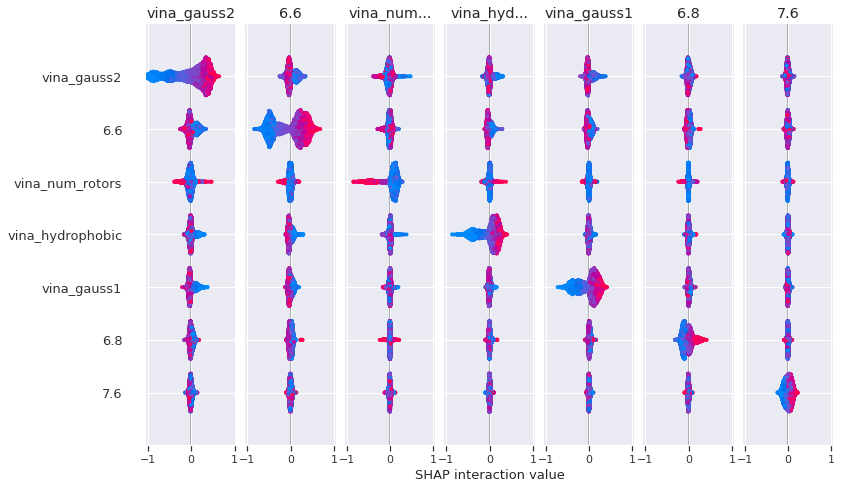

In [34]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(Pm_shap_inter_value, test_set[feature_list], plot_type="bar", show=False)
# plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/PCV_cluster_plot/PCV_training_1_shap.png", dpi=800, bbox_inches='tight')

Text(0.5, 1.0, 'Training set: PDBbind_minimized')

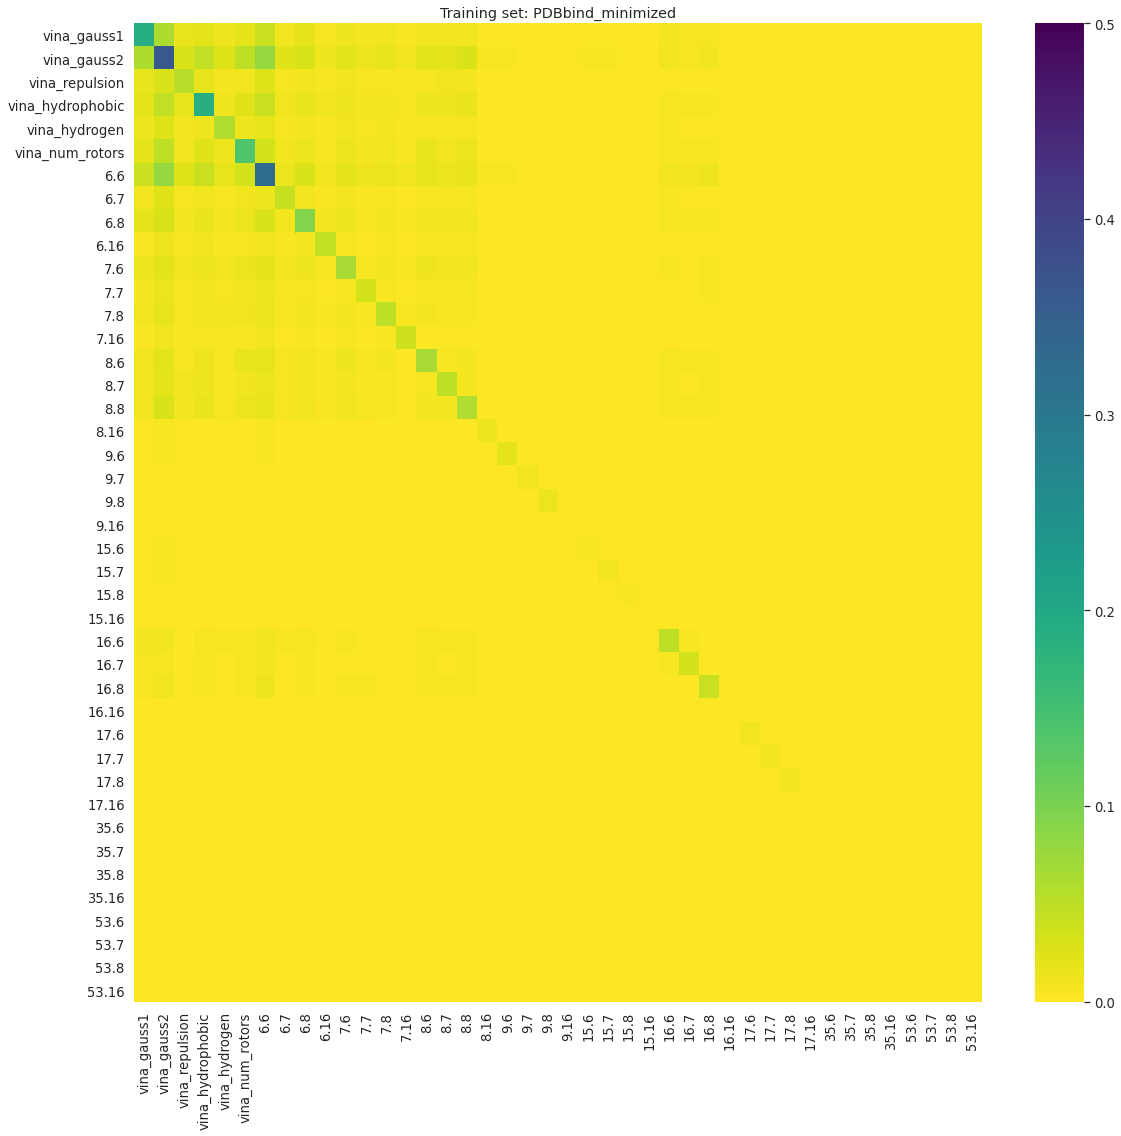

In [35]:

cm = plt.cm.get_cmap('viridis_r')
mean_shap = np.abs(Pm_shap_inter_value).mean(0)
df = pd.DataFrame(mean_shap,index=feature_list,columns=feature_list)
df.where(df.values == np.diagonal(df), df.values*2, inplace=True)

plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(df,cmap=cm,fmt='.3g',cbar=True,vmin=0, vmax=0.5)
plt.yticks(rotation=0) 
plt.title("Training set: PDBbind_minimized")
# plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/PCV_cluster_plot/PCV_heatmap_training_1.png", dpi=800, bbox_inches='tight')
                        

In [37]:
(np.mean(np.abs(np.sum(Pm_shap_inter_value, axis=1)), axis=0)).shape

(42,)

In [40]:
mean_feature = np.mean(np.abs(np.sum(Pm_shap_inter_value, axis=1)), axis=0)
mean_feature

array([1.29507329e-01, 2.90794866e-01, 5.43751294e-02, 1.38547851e-01,
       5.49211804e-02, 1.41441262e-01, 2.41480346e-01, 3.82684455e-02,
       6.84043163e-02, 3.87729489e-02, 5.68681277e-02, 3.16103200e-02,
       3.95338608e-02, 3.12482201e-02, 5.54081661e-02, 4.52895114e-02,
       5.30283439e-02, 1.28502787e-02, 1.71221716e-02, 8.86794767e-03,
       1.22324067e-02, 1.00292000e-03, 6.21933688e-03, 6.61676550e-03,
       4.55686152e-03, 4.82304329e-04, 4.38646405e-02, 2.95603887e-02,
       3.44398235e-02, 1.67909467e-03, 1.00765331e-02, 7.88467650e-03,
       7.71947018e-03, 6.23087300e-04, 1.07526857e-03, 6.75271779e-04,
       8.89432144e-04, 2.80221291e-04, 8.80648772e-04, 8.27823948e-04,
       6.66529416e-04, 1.83068438e-04])

In [50]:
sorted_idx = np.argsort(mean_feature)[::-1]
sorted_idx

array([ 1,  6,  5,  3,  0,  8, 10, 14,  4,  2, 16, 15, 26, 12,  9,  7, 28,
       11, 13, 27, 18, 17, 20, 30, 19, 31, 32, 23, 22, 24, 29, 34, 21, 36,
       38, 39, 35, 40, 33, 25, 37, 41])

In [51]:
mean_feature[sorted_idx][:10]

array([0.29079487, 0.24148035, 0.14144126, 0.13854785, 0.12950733,
       0.06840432, 0.05686813, 0.05540817, 0.05492118, 0.05437513])

In [53]:
np.array(feature_list)[sorted_idx][:10]

array(['vina_gauss2', '6.6', 'vina_num_rotors', 'vina_hydrophobic',
       'vina_gauss1', '6.8', '7.6', '8.6', 'vina_hydrogen',
       'vina_repulsion'], dtype='<U16')

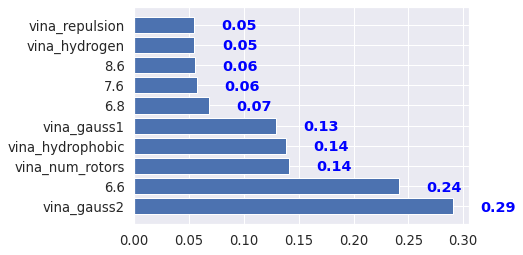

In [75]:
fig, ax = plt.subplots()
ax.barh(np.array(feature_list)[sorted_idx][:10], mean_feature[sorted_idx][:10])
for i, v in enumerate(mean_feature[sorted_idx][:10]):
    ax.text(v+0.025, i - .25, round(v, 2),
            color = 'blue', fontweight = 'bold')
# for index, value in enumerate(mean_feature[sorted_idx][:10]):
#     ax.text(value, index, str(round(value, 2)))

In [6]:
shap_inter_values = explainer.shap_interaction_values(test_set[:100][feature_list])
np.save(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/test/PDBbind_minimized_rm_core_training_1_xaa.npy", shap_inter_values)

# tail 1516

In [7]:
test_set_tail = '/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_data_scripts/PDBbind_minimized/splited_training_files/PDBbind_minimized_Rm_core_train_xad.csv'
test_tail_df = pd.read_csv(test_set_tail, sep='\t', header=0, names=['unique_identify', '-logAffi'])
test_set_tail_feature = pd.merge(test_tail_df, features, on=['unique_identify','-logAffi'])
len(test_set_tail_feature)

1516

In [8]:
tail_shap = np.load('split_shap_res/rm_core_ids/PDBbind_minimized/training_rep1_xad.npy')
tail_shap.shape

(1516, 42, 42)

<Figure size 1368x1296 with 0 Axes>

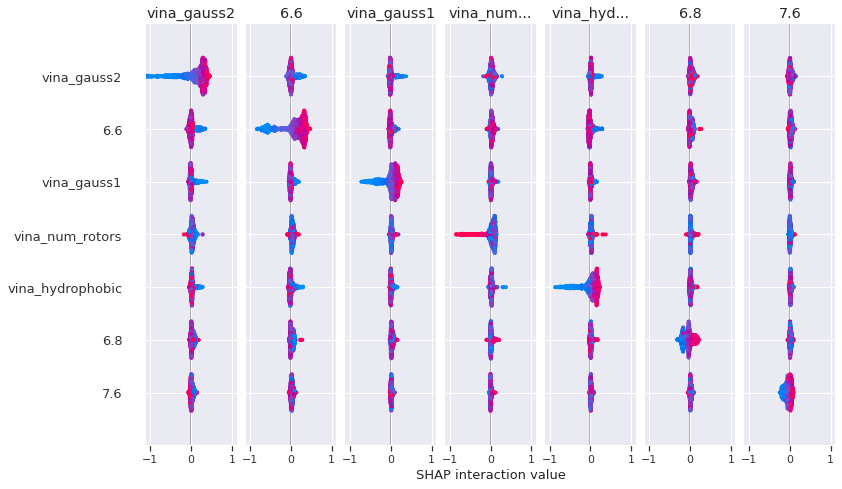

In [9]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(tail_shap, test_set_tail_feature[feature_list], plot_type="bar", show=False)

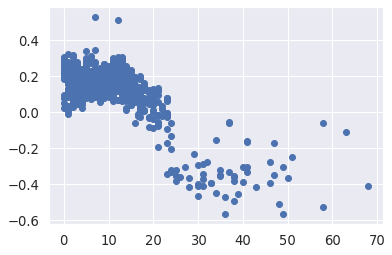

In [12]:
plt.scatter(test_set_tail_feature["vina_num_rotors"],np.sum(tail_shap, axis=1)[:,feature_list.index('vina_num_rotors')])

In [11]:
feature_list

['vina_gauss1',
 'vina_gauss2',
 'vina_repulsion',
 'vina_hydrophobic',
 'vina_hydrogen',
 'vina_num_rotors',
 '6.6',
 '6.7',
 '6.8',
 '6.16',
 '7.6',
 '7.7',
 '7.8',
 '7.16',
 '8.6',
 '8.7',
 '8.8',
 '8.16',
 '9.6',
 '9.7',
 '9.8',
 '9.16',
 '15.6',
 '15.7',
 '15.8',
 '15.16',
 '16.6',
 '16.7',
 '16.8',
 '16.16',
 '17.6',
 '17.7',
 '17.8',
 '17.16',
 '35.6',
 '35.7',
 '35.8',
 '35.16',
 '53.6',
 '53.7',
 '53.8',
 '53.16']

In [10]:
np.mean(np.abs(np.sum(tail_shap, axis=1)), axis=0)

array([1.70357133e-01, 3.43077900e-01, 4.86578999e-02, 1.63196824e-01,
       6.95440187e-02, 1.70275646e-01, 3.11435223e-01, 5.59624590e-02,
       1.30220671e-01, 4.55163982e-02, 7.91000973e-02, 4.55204702e-02,
       5.45676210e-02, 3.84670561e-02, 6.24421769e-02, 5.58250341e-02,
       7.19326766e-02, 1.62012021e-02, 2.41828006e-02, 1.34310781e-02,
       1.75403367e-02, 1.79844229e-03, 7.17498446e-03, 8.32693121e-03,
       5.06670010e-03, 3.74027590e-04, 7.10368617e-02, 4.94658355e-02,
       4.91781221e-02, 2.97202637e-03, 1.46113505e-02, 1.08898633e-02,
       1.07199742e-02, 8.27646328e-04, 1.05200319e-03, 6.54386022e-04,
       7.97702172e-04, 1.99586369e-04, 1.36818150e-03, 1.28094594e-03,
       1.14431409e-03, 3.16207003e-04])

# 0418

In [13]:
PmIUw_a = np.load('/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/test/PmIUw/training_rep1_xaa.npy')
PmIUw_b = np.load('/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/test/PmIUw/training_rep1_xab.npy')

In [14]:
PmIUw_a.shape

(3999, 42, 42)

In [15]:
PmIUw_b.shape

(635, 42, 42)

In [16]:
np.concatenate((PmIUw_a, PmIUw_b)).shape

(4634, 42, 42)

In [18]:
PmIUw_all = np.load('/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/PDBbind_minimized_intersected_Uw/training_1.npy')
PmIUw_all.shape

(4634, 42, 42)

In [19]:
(PmIUw_all == np.concatenate((PmIUw_a, PmIUw_b))).all()

True

# PLANet_Uw_b/c

In [1]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/pubhome/xli02/opt/miniconda/envs/

In [2]:
Uw_b_shap_inter = np.load('split_shap_res/rm_core_ids/PLANet_Uw/training_rep1_xab.npy')
Uw_c_shap_inter = np.load('split_shap_res/rm_core_ids/PLANet_Uw/training_rep1_xac.npy')
Uw_bc_shap_inter = np.concatenate((Uw_b_shap_inter, Uw_c_shap_inter))

In [3]:
Uw_bc_shap_inter.shape

(8000, 42, 42)

In [4]:
features = pd.read_csv("/pubhome/xli02/project/PLIM/deep_learning/RFscore/featured_data/tow_datasets_features_6A.csv", sep='\t')

vina_title =['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
rf_v1_title = features.columns.tolist()[:36]
feature_list = vina_title+rf_v1_title

In [5]:
dataset_name = 'PLANet_Uw'
with open(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/{dataset_name}_Rm_core/1/best_model_VR1_RF.pkl", "rb") as f:
    Uw_model = joblib.load(f)
Uw_explainer = shap.TreeExplainer(Uw_model)

In [6]:
Uw_train_b = pd.read_csv('split_data_scripts/PLANet_Uw/splited_training_files/PLANet_Uw_Rm_core_train_xab.csv', sep='\t')
Uw_train_c = pd.read_csv('split_data_scripts/PLANet_Uw/splited_training_files/PLANet_Uw_Rm_core_train_xac.csv', sep='\t')
Uw_train_bc = pd.concat([Uw_train_b, Uw_train_c])
Uw_train_bc.shape

(8000, 2)

In [81]:
# Uw_test_df = pd.read_csv(test_set, sep='\t', header=0, names=['unique_identify', '-logAffi'])
# len(Uw_test_df)

55804

In [82]:
# Uw_test_set = pd.merge(Uw_test_df, features, on=['unique_identify','-logAffi'])
# Uw_test_set.shape

(55798, 152)

In [7]:
Uw_train_bc_feature = pd.merge(Uw_train_bc, features, on=['unique_identify','-logAffi'])

<Figure size 1368x1296 with 0 Axes>

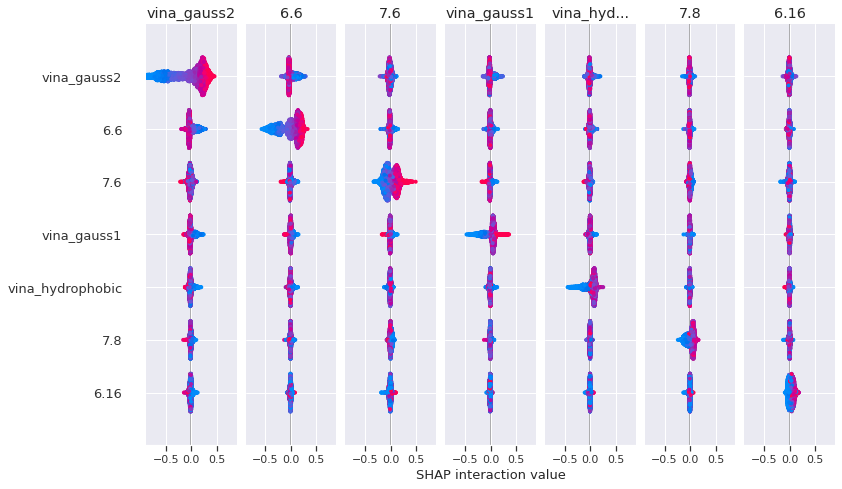

In [9]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(Uw_bc_shap_inter, Uw_train_bc_feature[feature_list], plot_type="bar", show=False)
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids/PLANet_Uw/imgs/Uw_bc_inter_value_beeswarm.png", dpi=800, bbox_inches='tight')

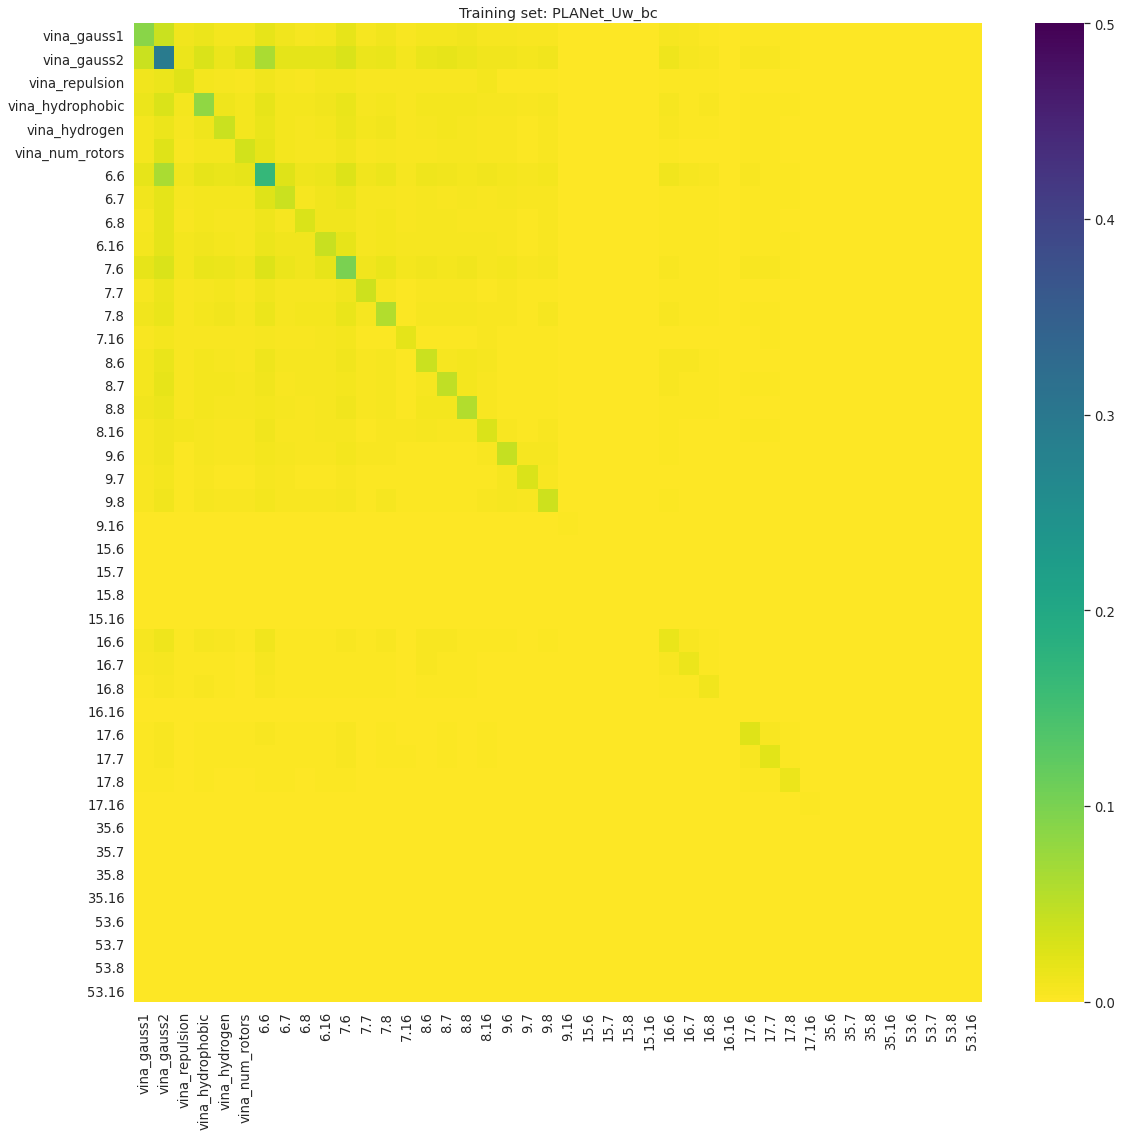

In [10]:

cm = plt.cm.get_cmap('viridis_r')
mean_shap = np.abs(Uw_bc_shap_inter).mean(0)
df = pd.DataFrame(mean_shap,index=feature_list,columns=feature_list)
df.where(df.values == np.diagonal(df), df.values*2, inplace=True)

plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(df,cmap=cm,fmt='.3g',cbar=True,vmin=0, vmax=0.5)
plt.yticks(rotation=0) 
plt.title("Training set: PLANet_Uw_bc")
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids/PLANet_Uw/imgs/Uw_bc_inter_value_heatmap.png", dpi=800, bbox_inches='tight')
                        

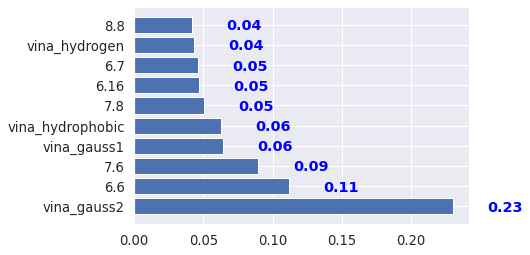

In [11]:
mean_feature = np.mean(np.abs(np.sum(Uw_bc_shap_inter, axis=1)), axis=0)
sorted_idx = np.argsort(mean_feature)[::-1]
fig, ax = plt.subplots()
ax.barh(np.array(feature_list)[sorted_idx][:10], mean_feature[sorted_idx][:10])
for i, v in enumerate(mean_feature[sorted_idx][:10]):
    ax.text(v+0.025, i - .25, round(v, 2),
            color = 'blue', fontweight = 'bold')
# for index, value in enumerate(mean_feature[sorted_idx][:10]):
#     ax.text(value, index, str(round(value, 2)))